In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
datagen = ImageDataGenerator(rotation_range=5,
                             width_shift_range=0.01,
                             height_shift_range=0.01,
                             shear_range=0.01,
                             zoom_range=[0.95, 1.05],
                             fill_mode='nearest')

In [16]:
train_data_dir = 'data/train'
valid_data_dir = 'data/test'

train_it = datagen.flow_from_directory(train_data_dir,
                                       target_size=(125, 175),
                                       color_mode='grayscale',
                                       class_mode='categorical',
                                       batch_size=32)
valid_it = datagen.flow_from_directory(valid_data_dir,
                                       target_size=(125, 175),
                                       color_mode='grayscale',
                                       class_mode='categorical',
                                       batch_size=32)

Found 5232 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


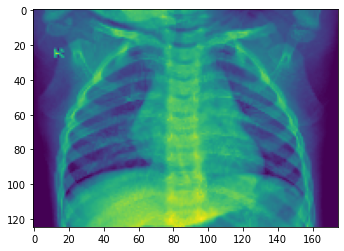

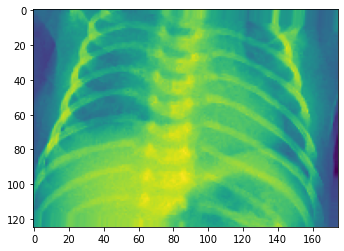

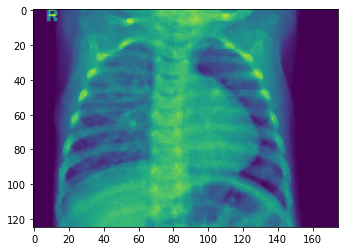

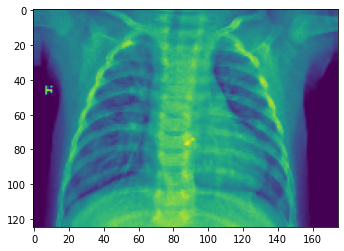

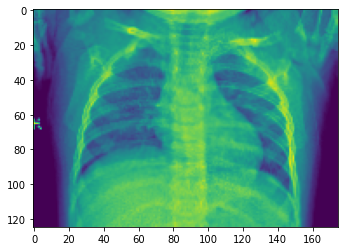

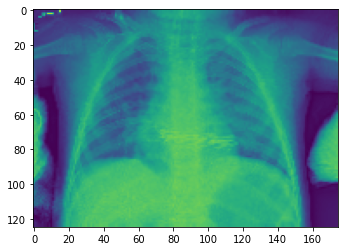

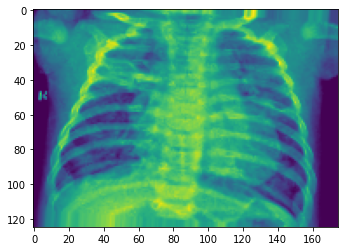

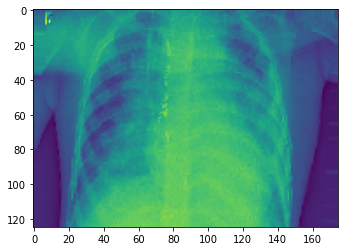

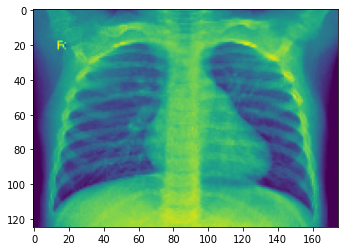

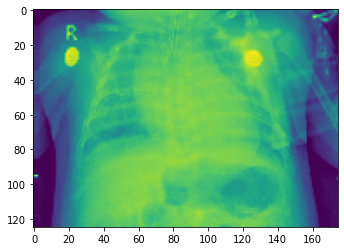

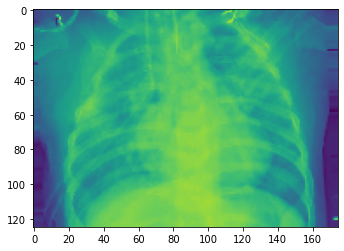

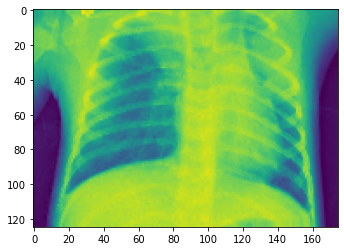

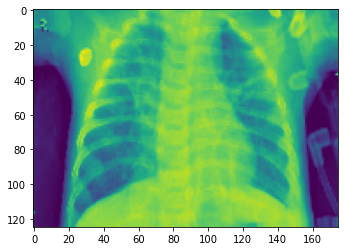

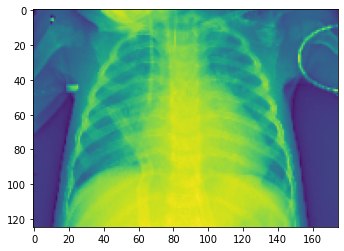

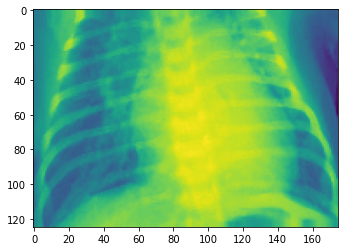

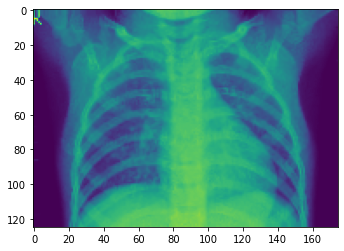

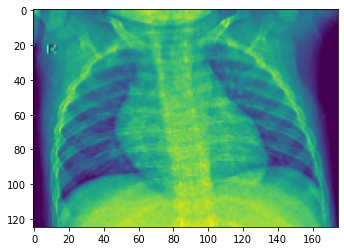

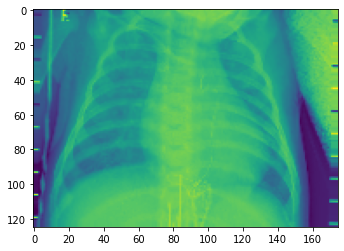

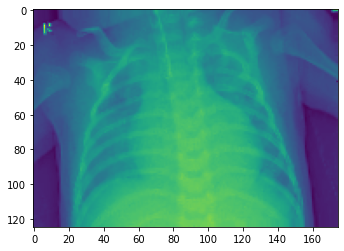

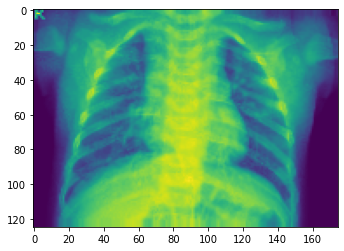

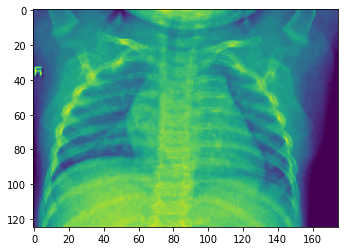

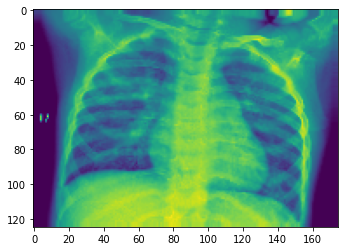

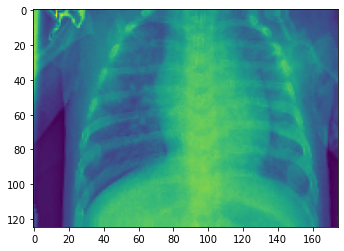

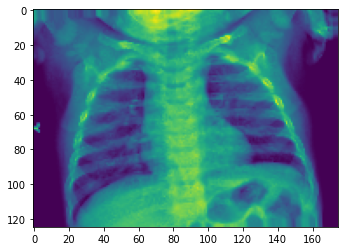

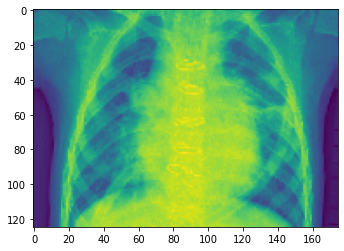

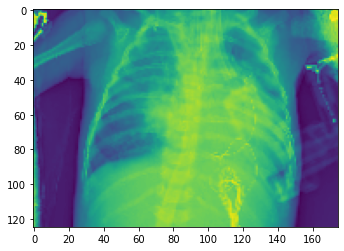

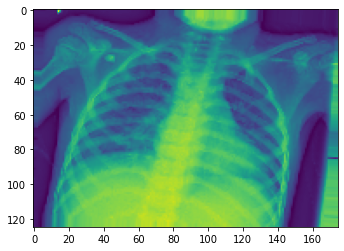

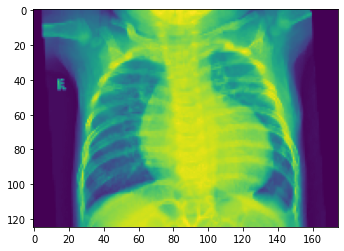

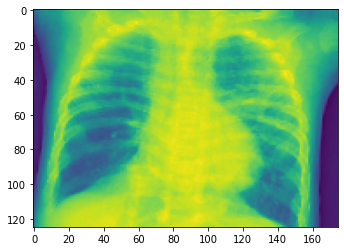

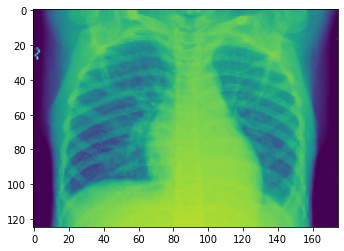

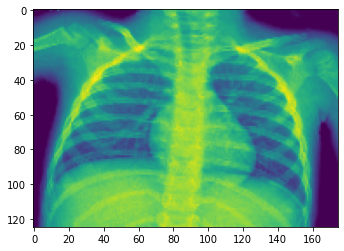

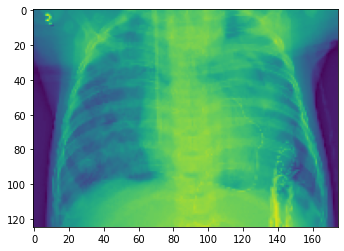

In [17]:
data_iter = iter(train_it)

images, labels = next(data_iter)
for ii in range(32):
    plt.figure()
    plt.imshow(images[ii].reshape((125, 175)))
    plt.show()

In [18]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(125, 175, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (7, 7), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 123, 173, 32)      320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 123, 173, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 61, 86, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 59, 84, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 59, 84, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 29, 42, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 38, 64)       

In [19]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_it,
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it,
                    validation_steps=len(valid_it),
                    epochs=50)

Epoch 1/50
164/164 [==============================] - 152s 926ms/step - loss: 0.9476 - accuracy: 0.6028 - val_loss: 0.7989 - val_accuracy: 0.7484
Epoch 2/50
164/164 [==============================] - 132s 805ms/step - loss: 0.8443 - accuracy: 0.7049 - val_loss: 0.8806 - val_accuracy: 0.6667
Epoch 3/50
164/164 [==============================] - 123s 750ms/step - loss: 0.8630 - accuracy: 0.6886 - val_loss: 1.1088 - val_accuracy: 0.4423
Epoch 4/50
164/164 [==============================] - 139s 845ms/step - loss: 0.8374 - accuracy: 0.7131 - val_loss: 1.0641 - val_accuracy: 0.4872
Epoch 5/50
164/164 [==============================] - 124s 754ms/step - loss: 0.8283 - accuracy: 0.7215 - val_loss: 1.1086 - val_accuracy: 0.4423
Epoch 6/50
164/164 [==============================] - 134s 819ms/step - loss: 0.8155 - accuracy: 0.7341 - val_loss: 0.8288 - val_accuracy: 0.7212
Epoch 7/50
164/164 [==============================] - 133s 810ms/step - loss: 0.8010 - accuracy: 0.7494 - val_loss: 0.8796 -

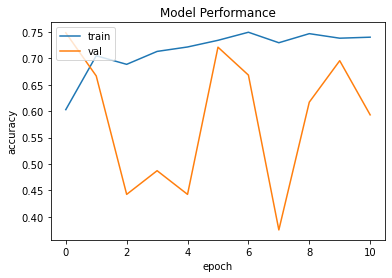

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

conv2d_12_input (1, 125, 175, 1) 


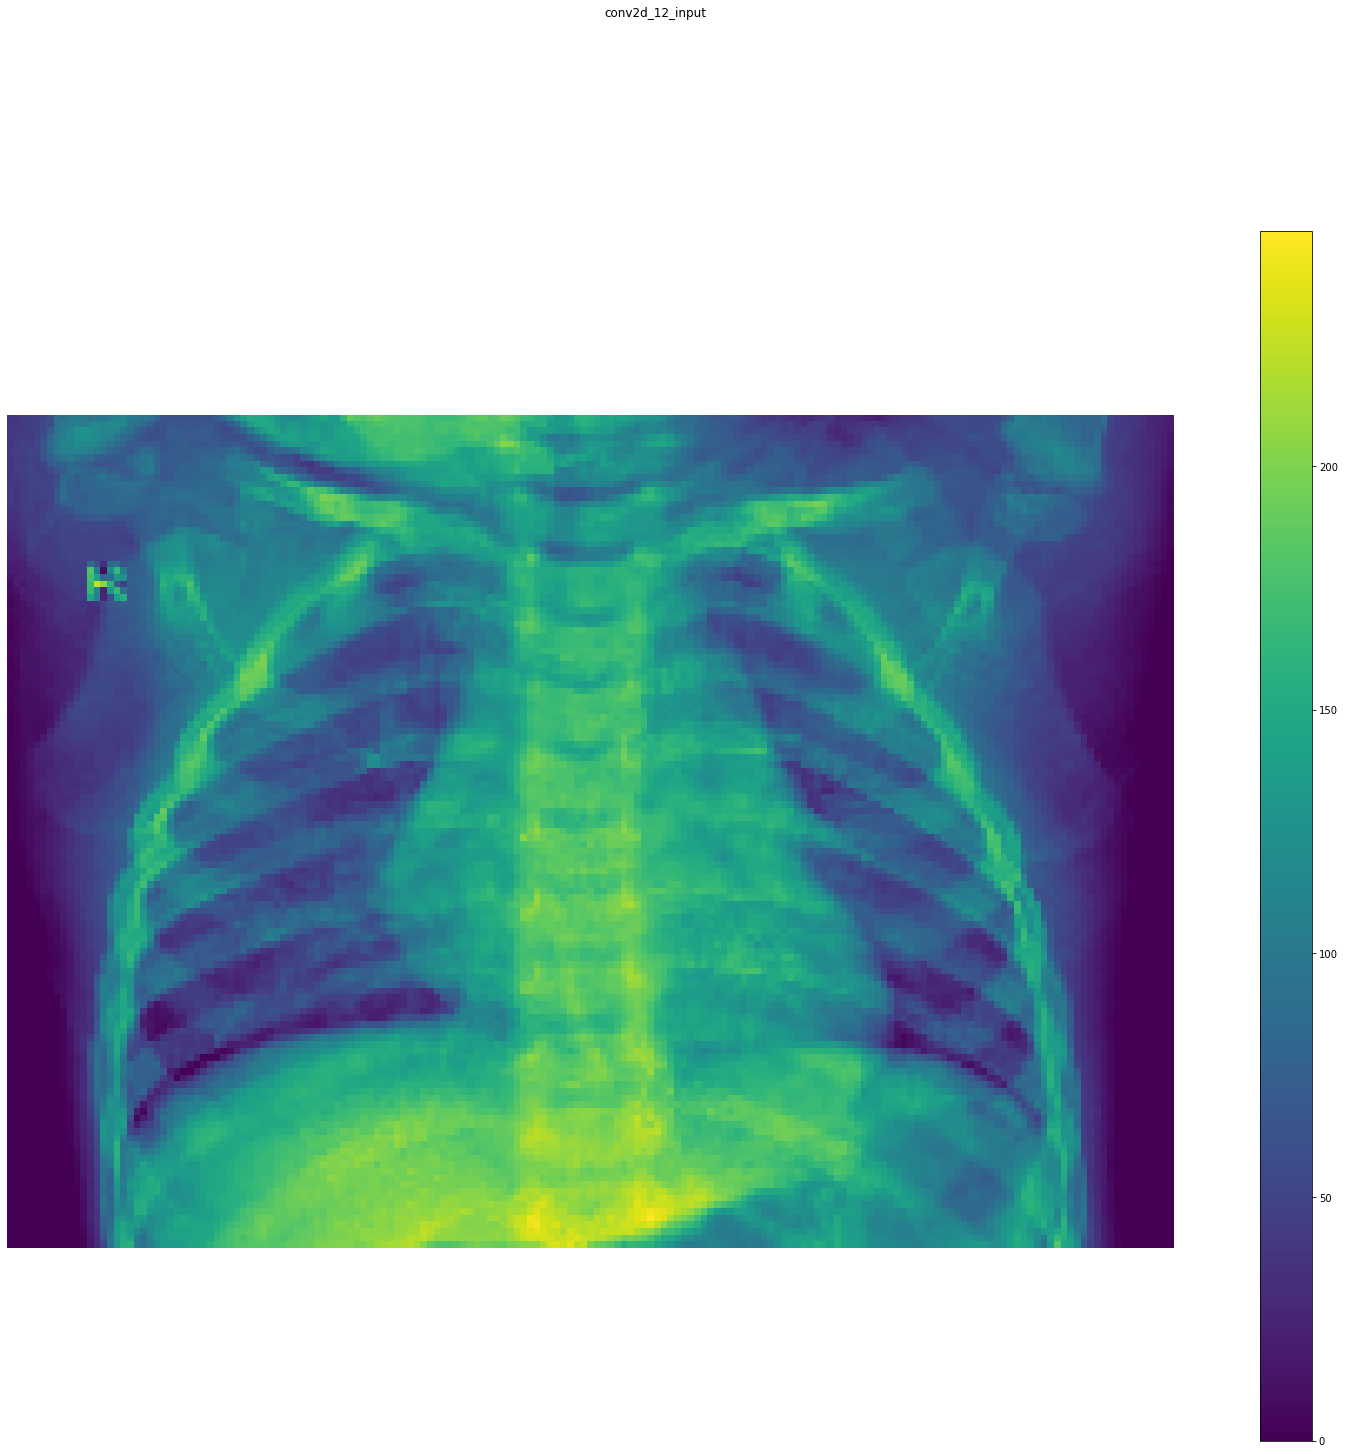

conv2d_12 (1, 123, 173, 32) 


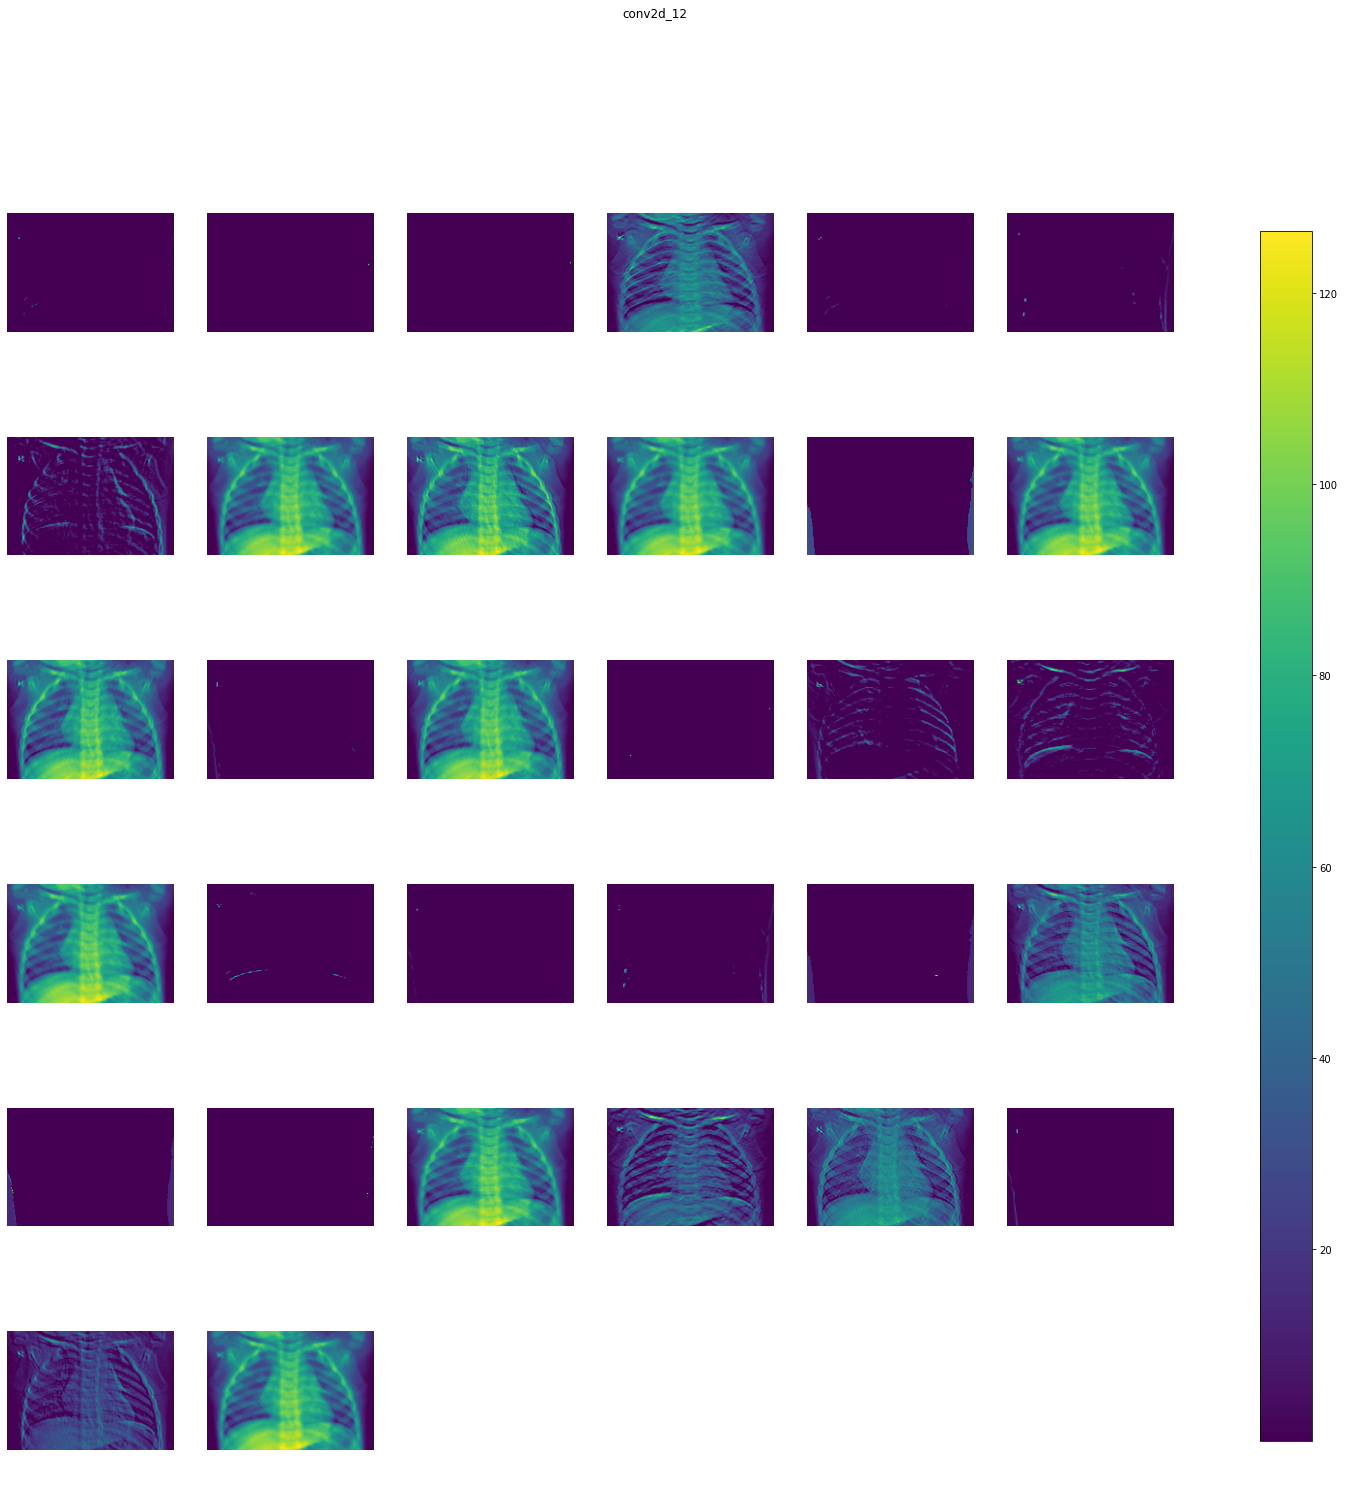

batch_normalization_3 (1, 123, 173, 32) 


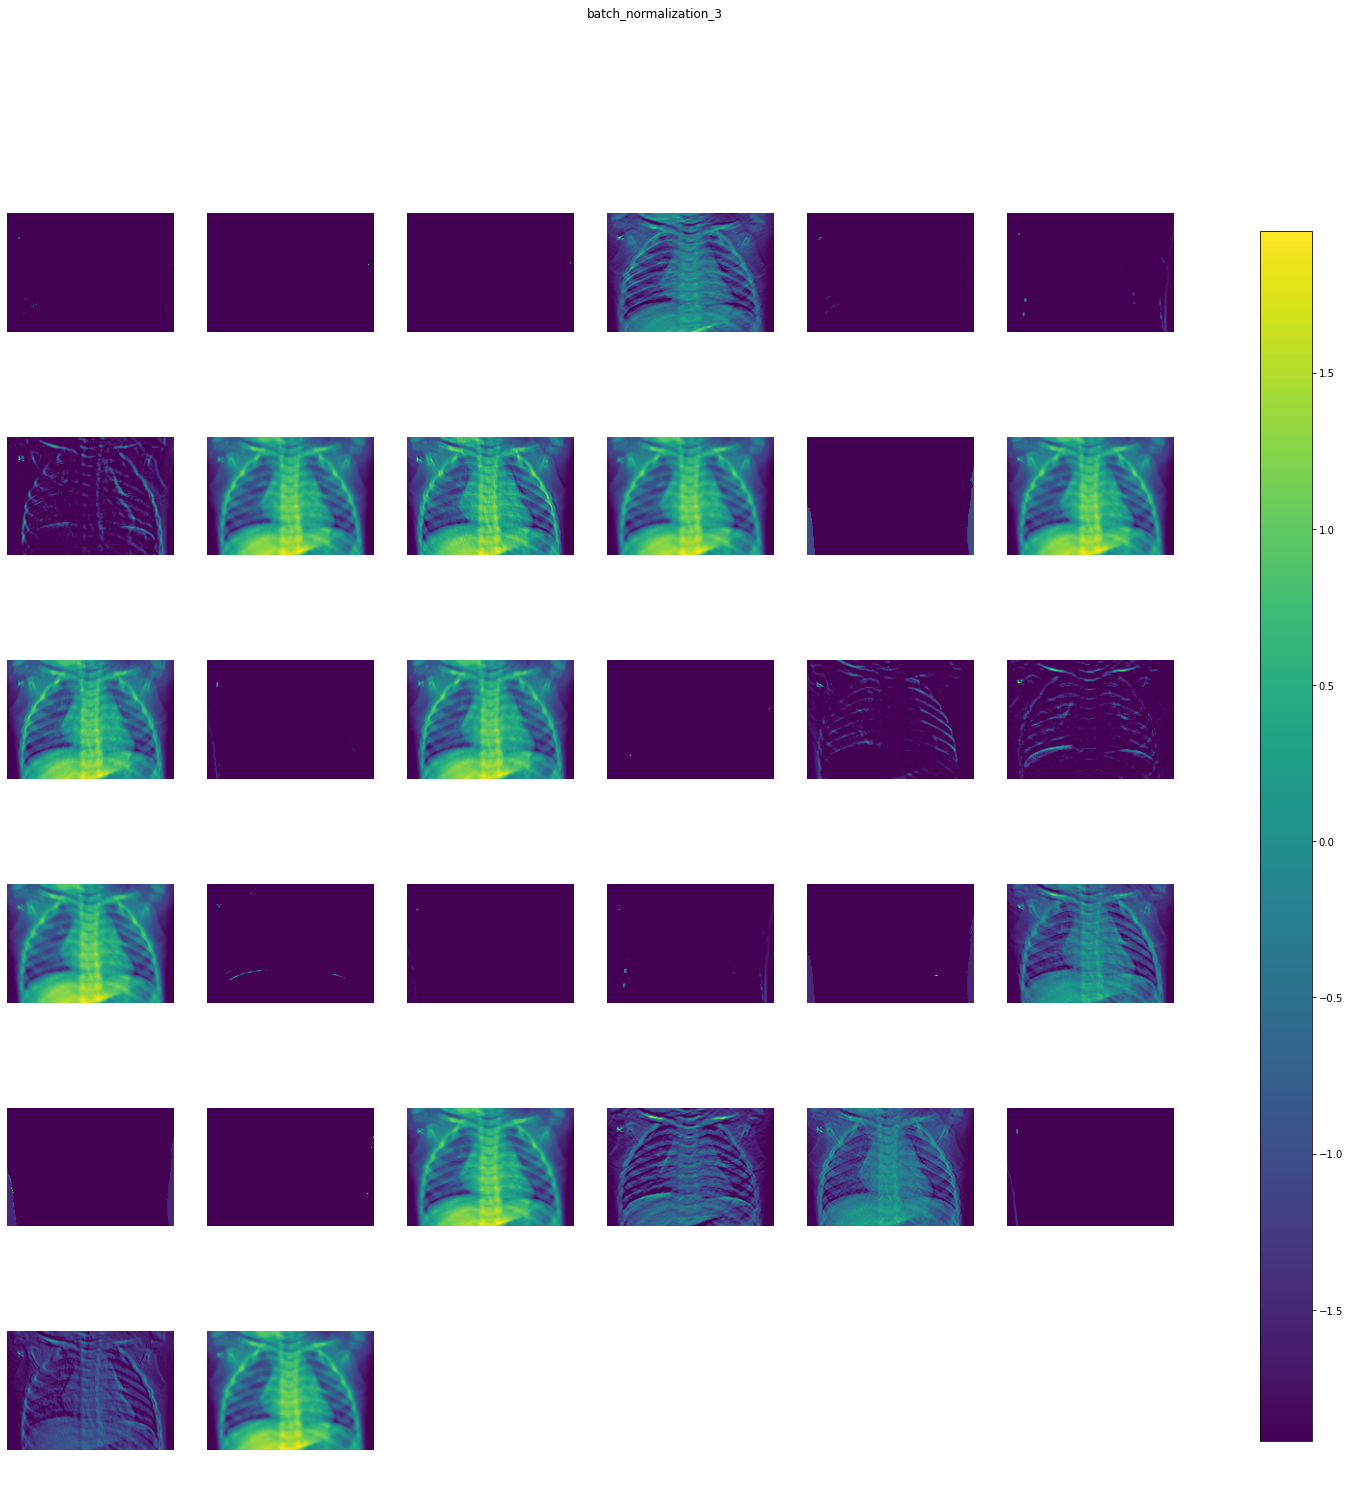

max_pooling2d_12 (1, 61, 86, 32) 


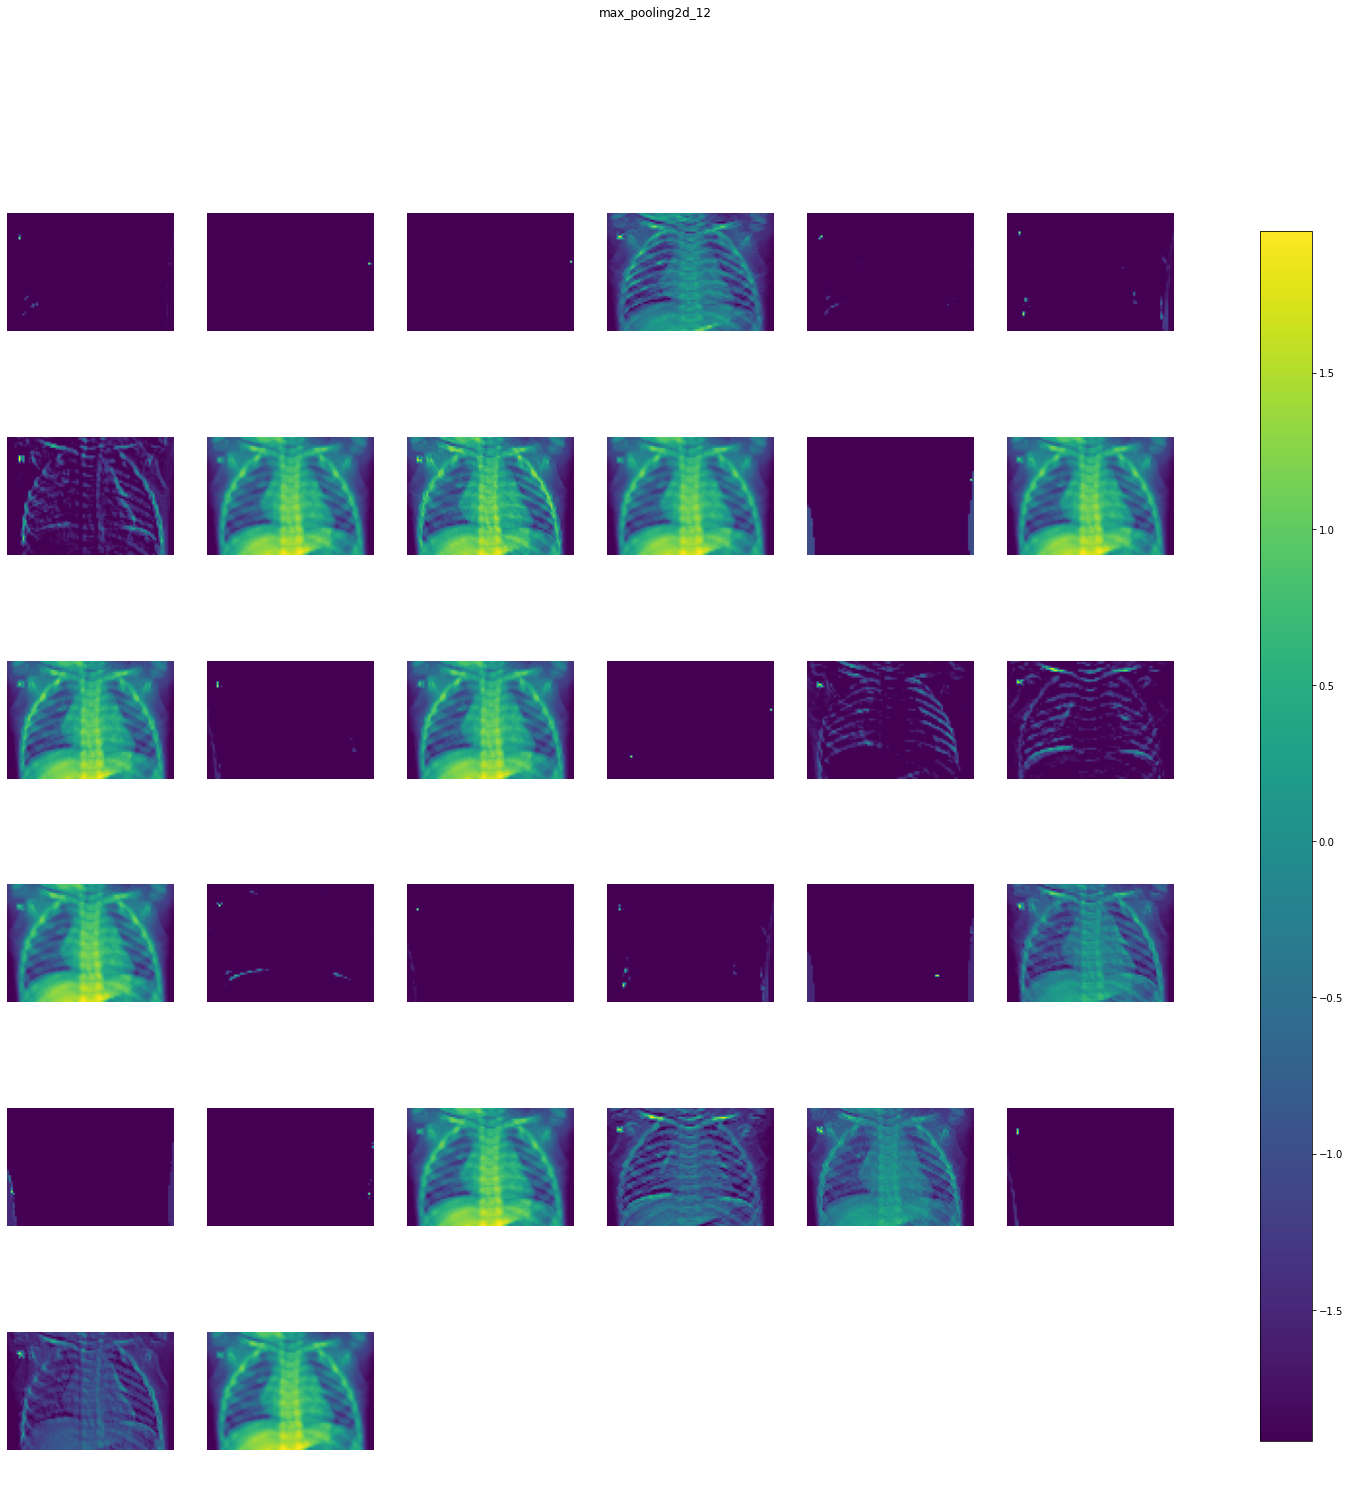

conv2d_13 (1, 59, 84, 64) 


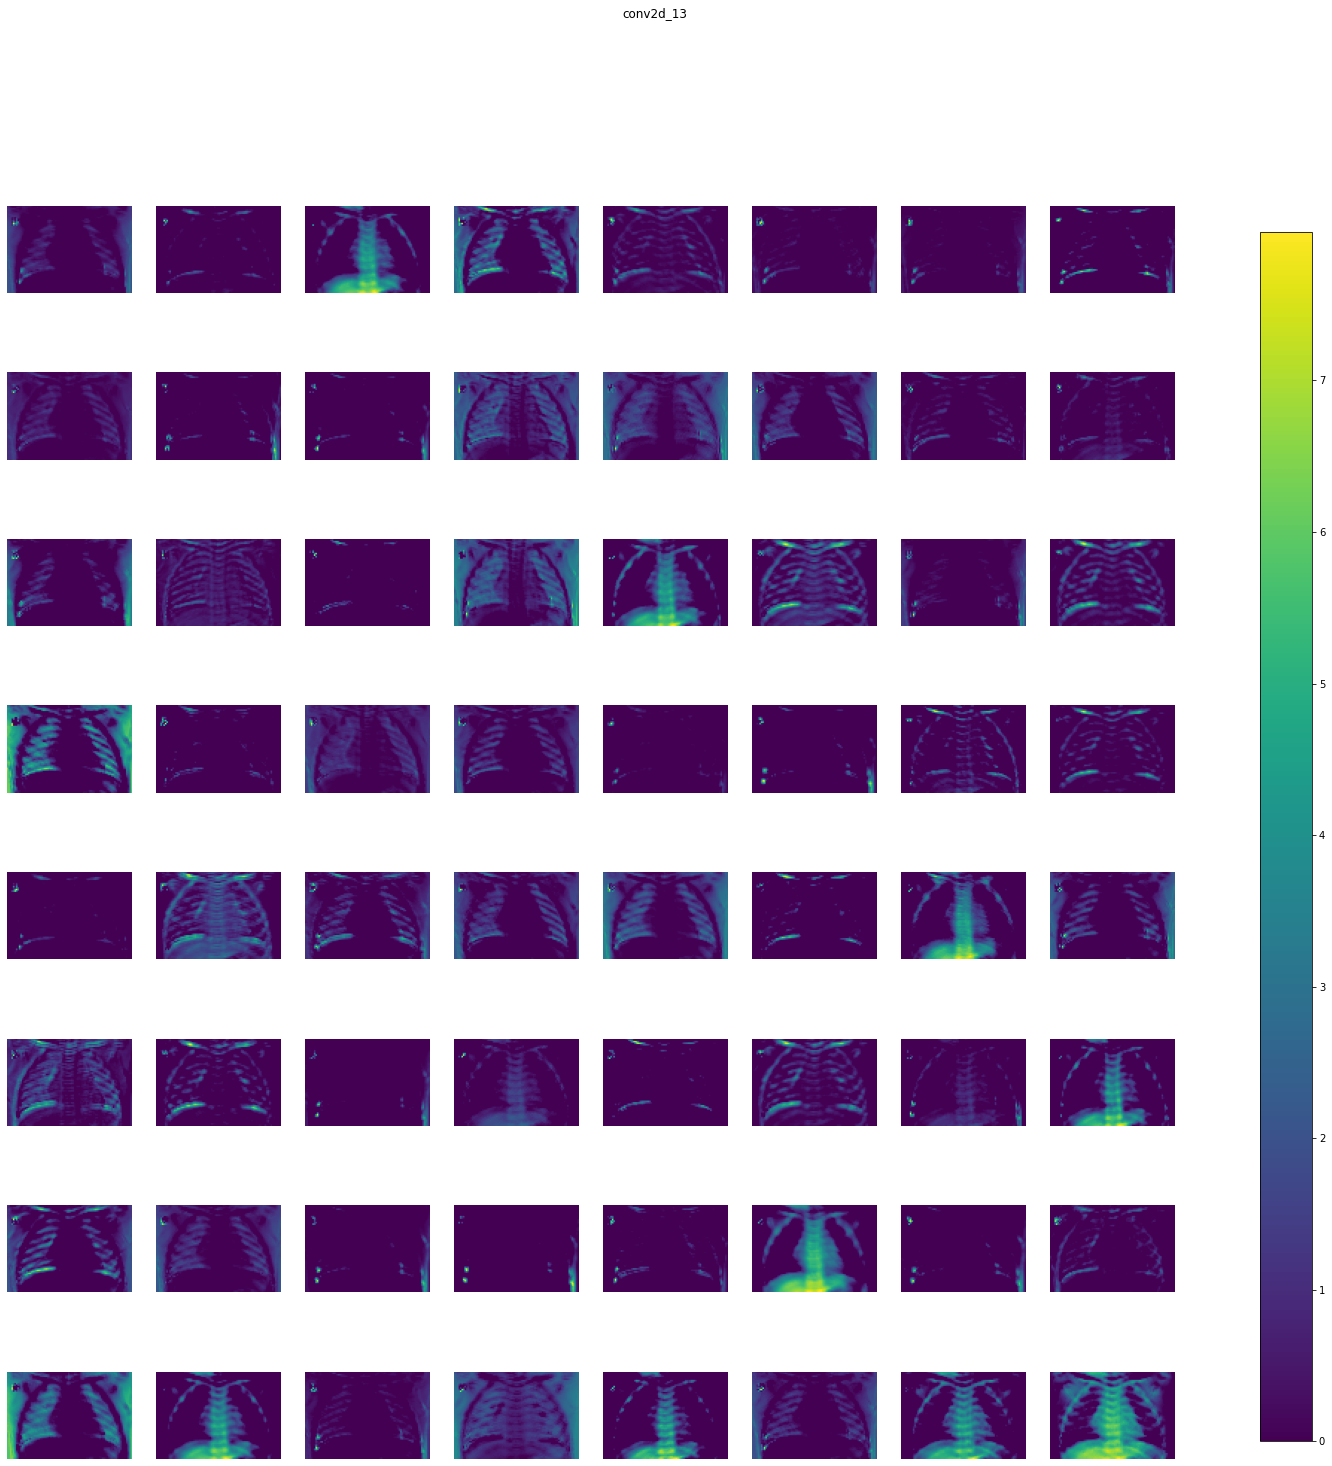

batch_normalization_4 (1, 59, 84, 64) 


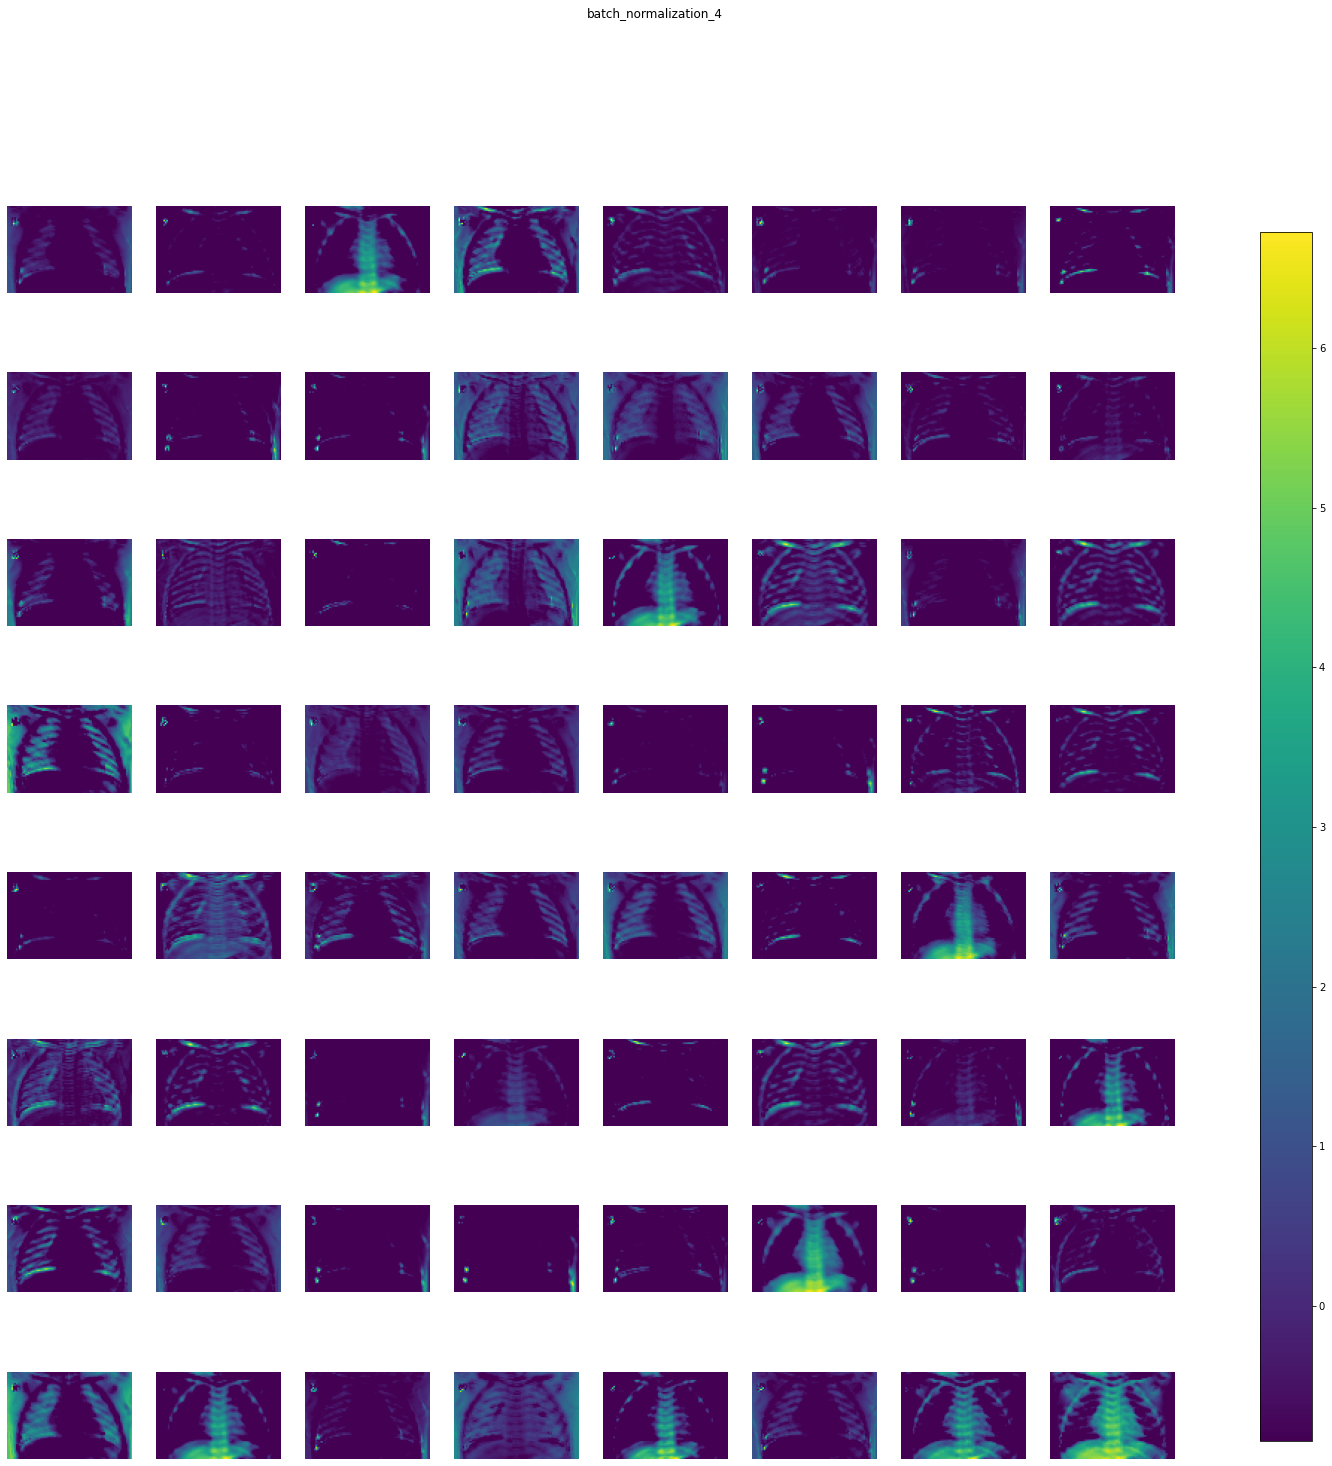

max_pooling2d_13 (1, 29, 42, 64) 


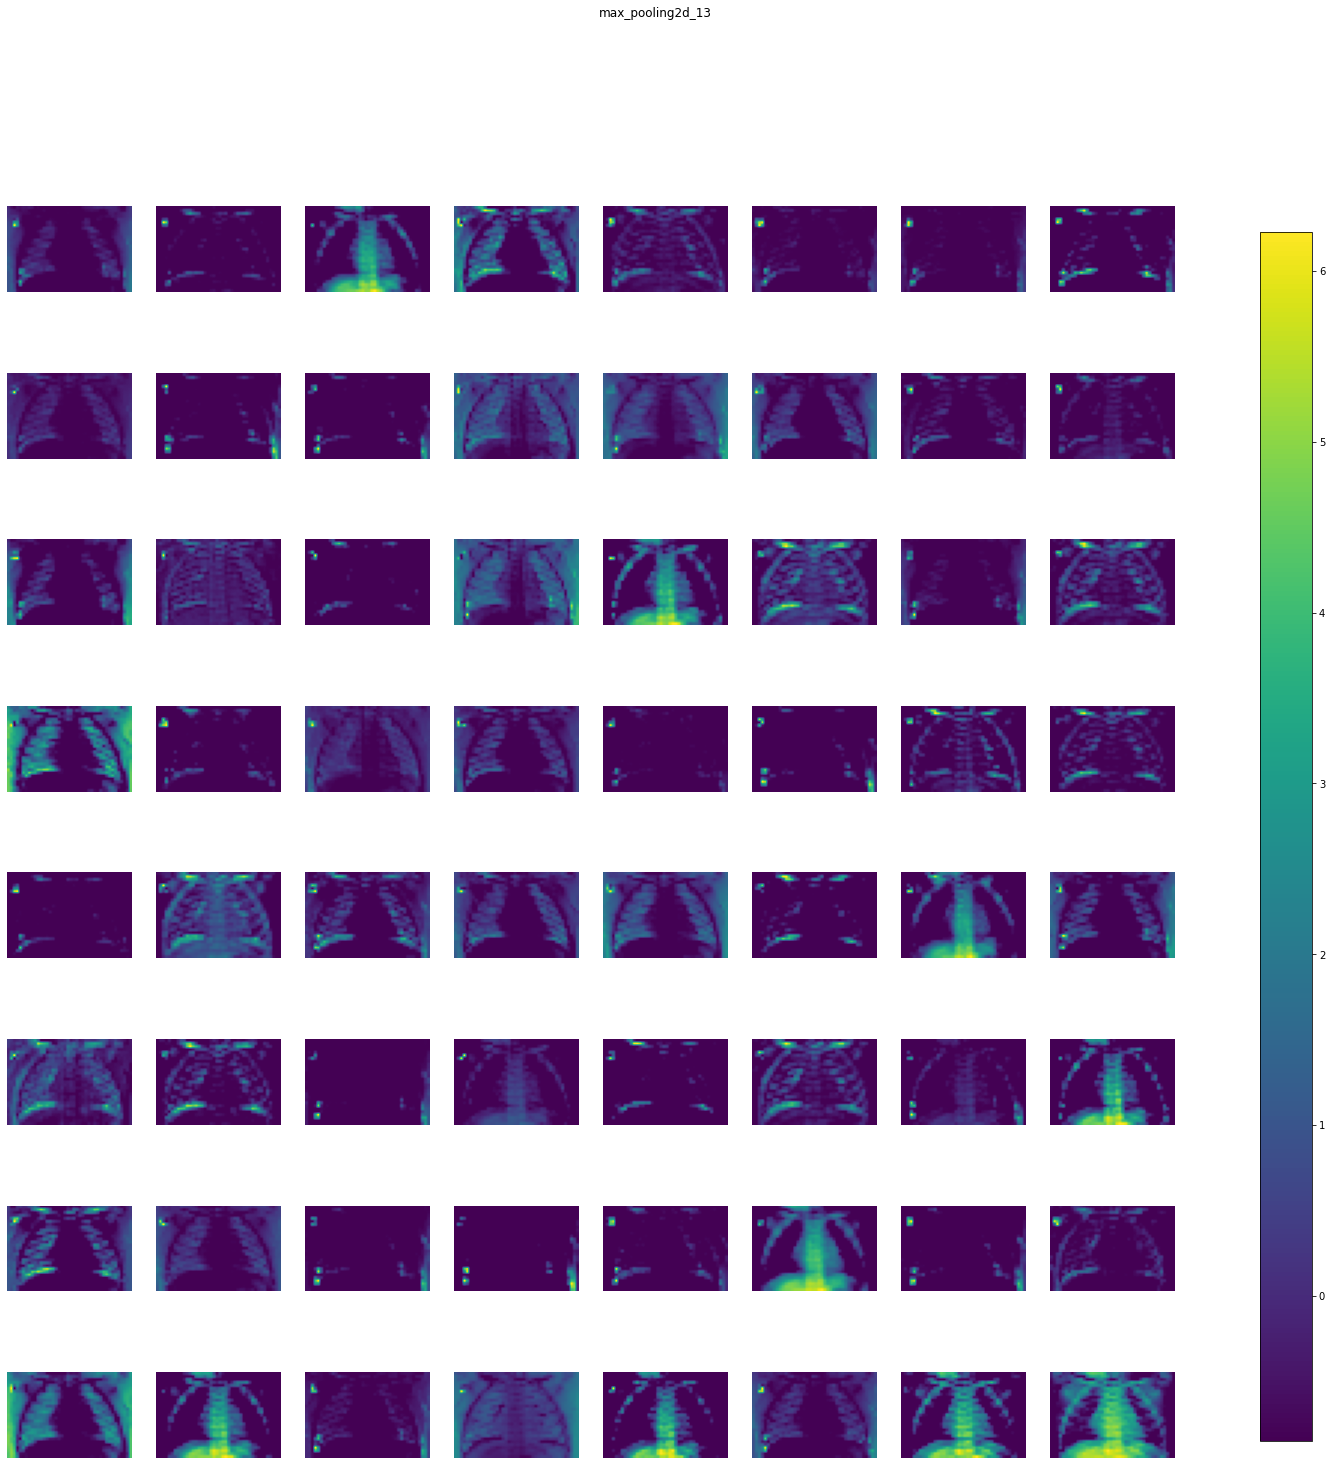

conv2d_14 (1, 25, 38, 64) 


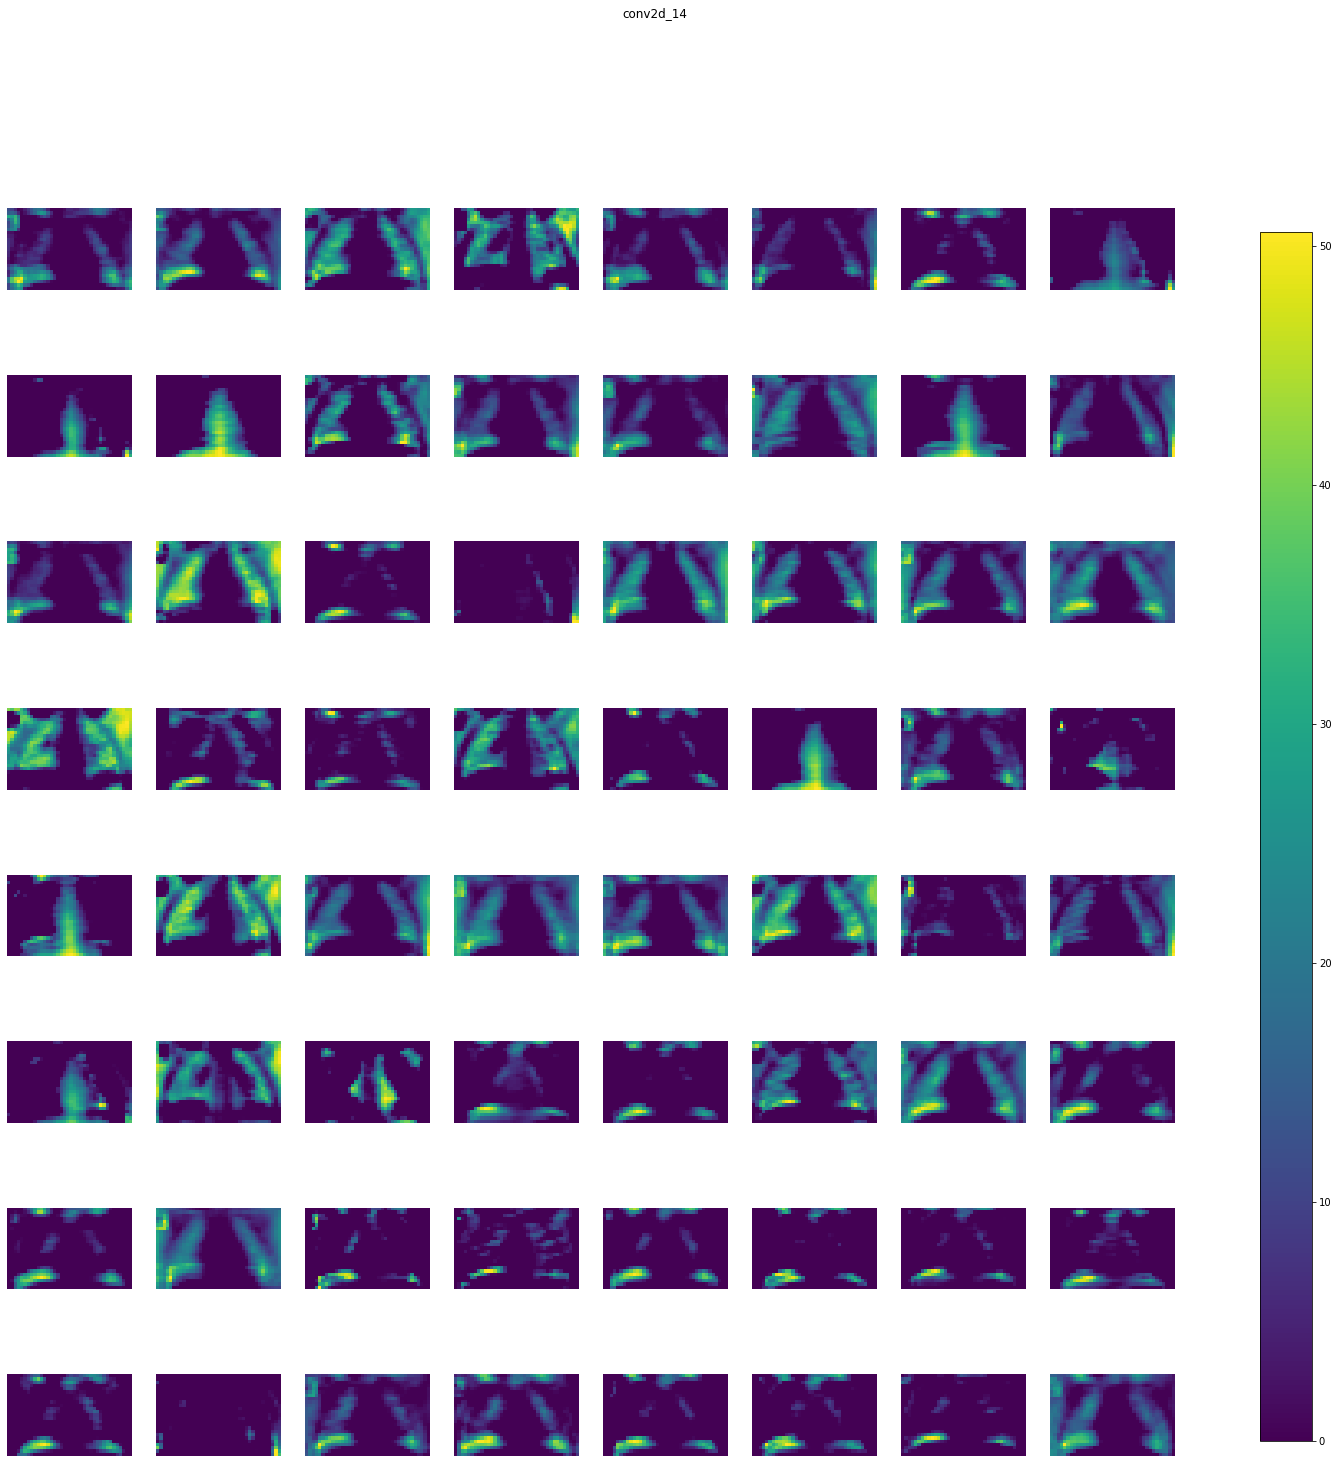

batch_normalization_5 (1, 25, 38, 64) 


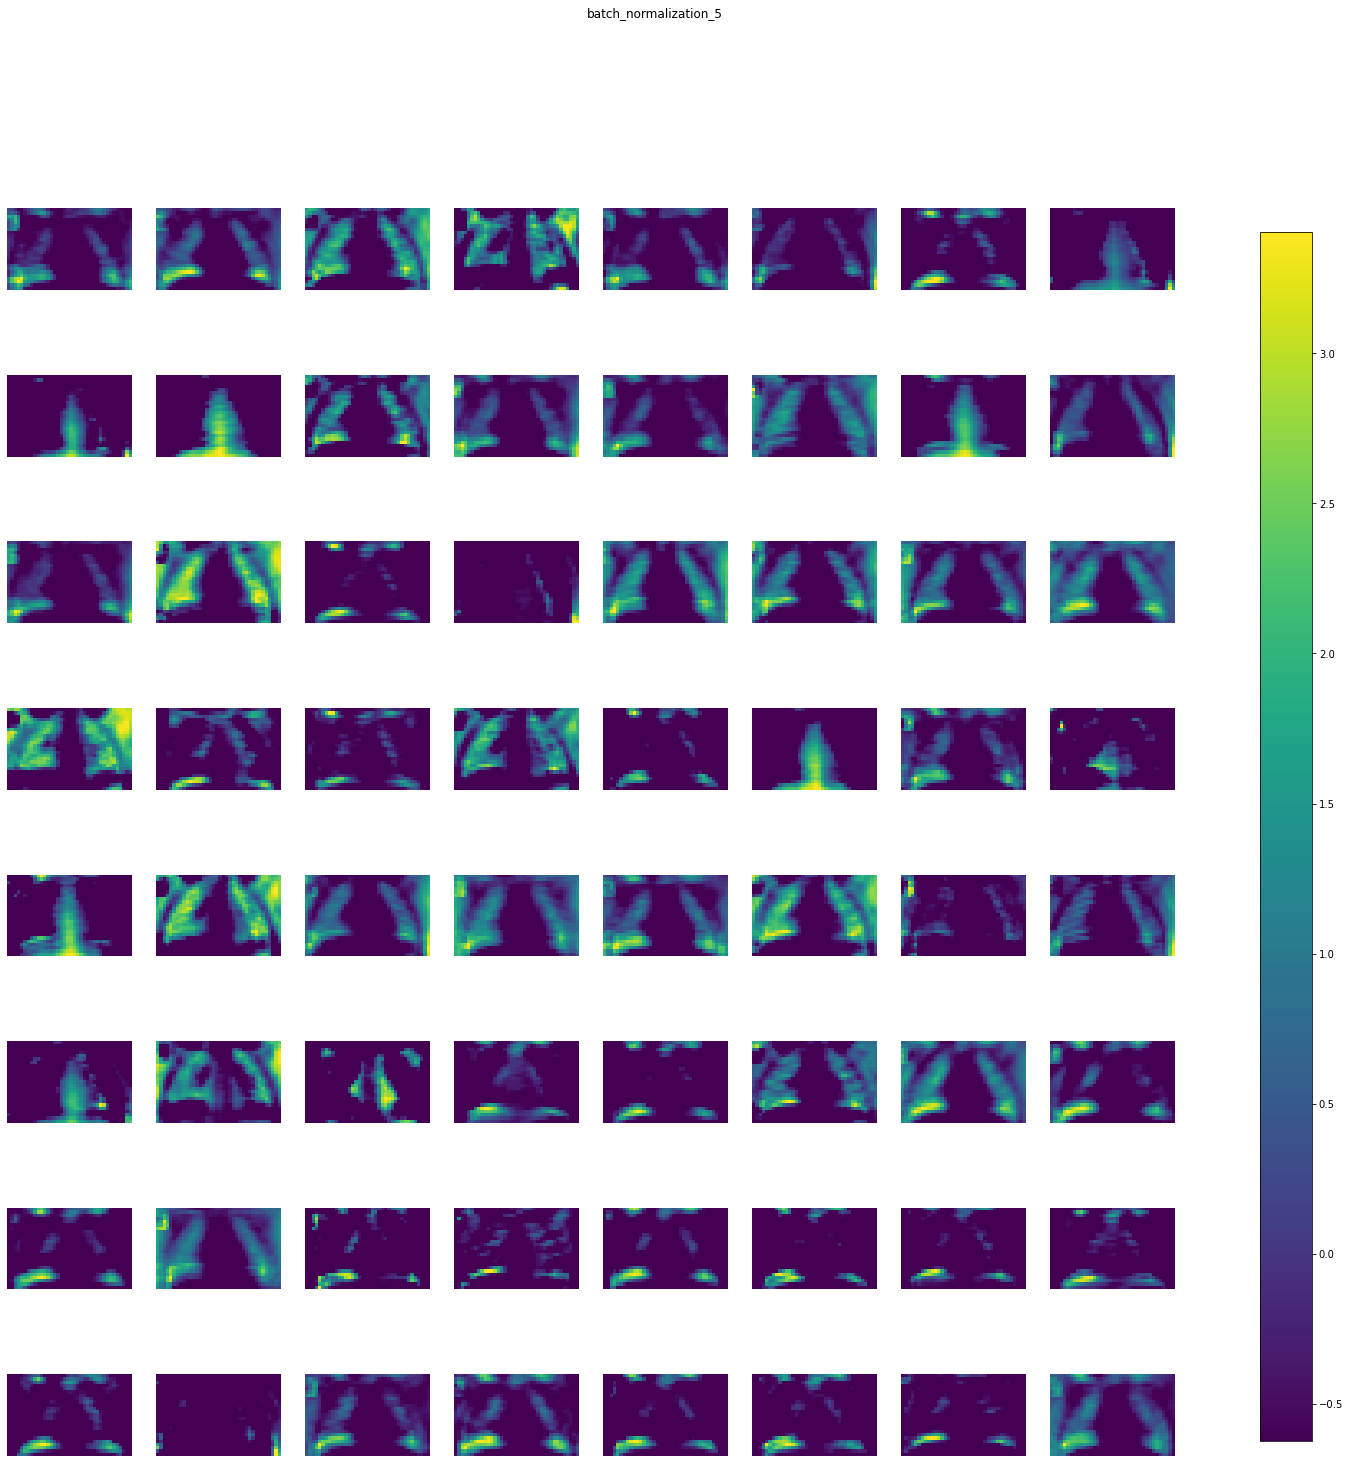

max_pooling2d_14 (1, 8, 12, 64) 


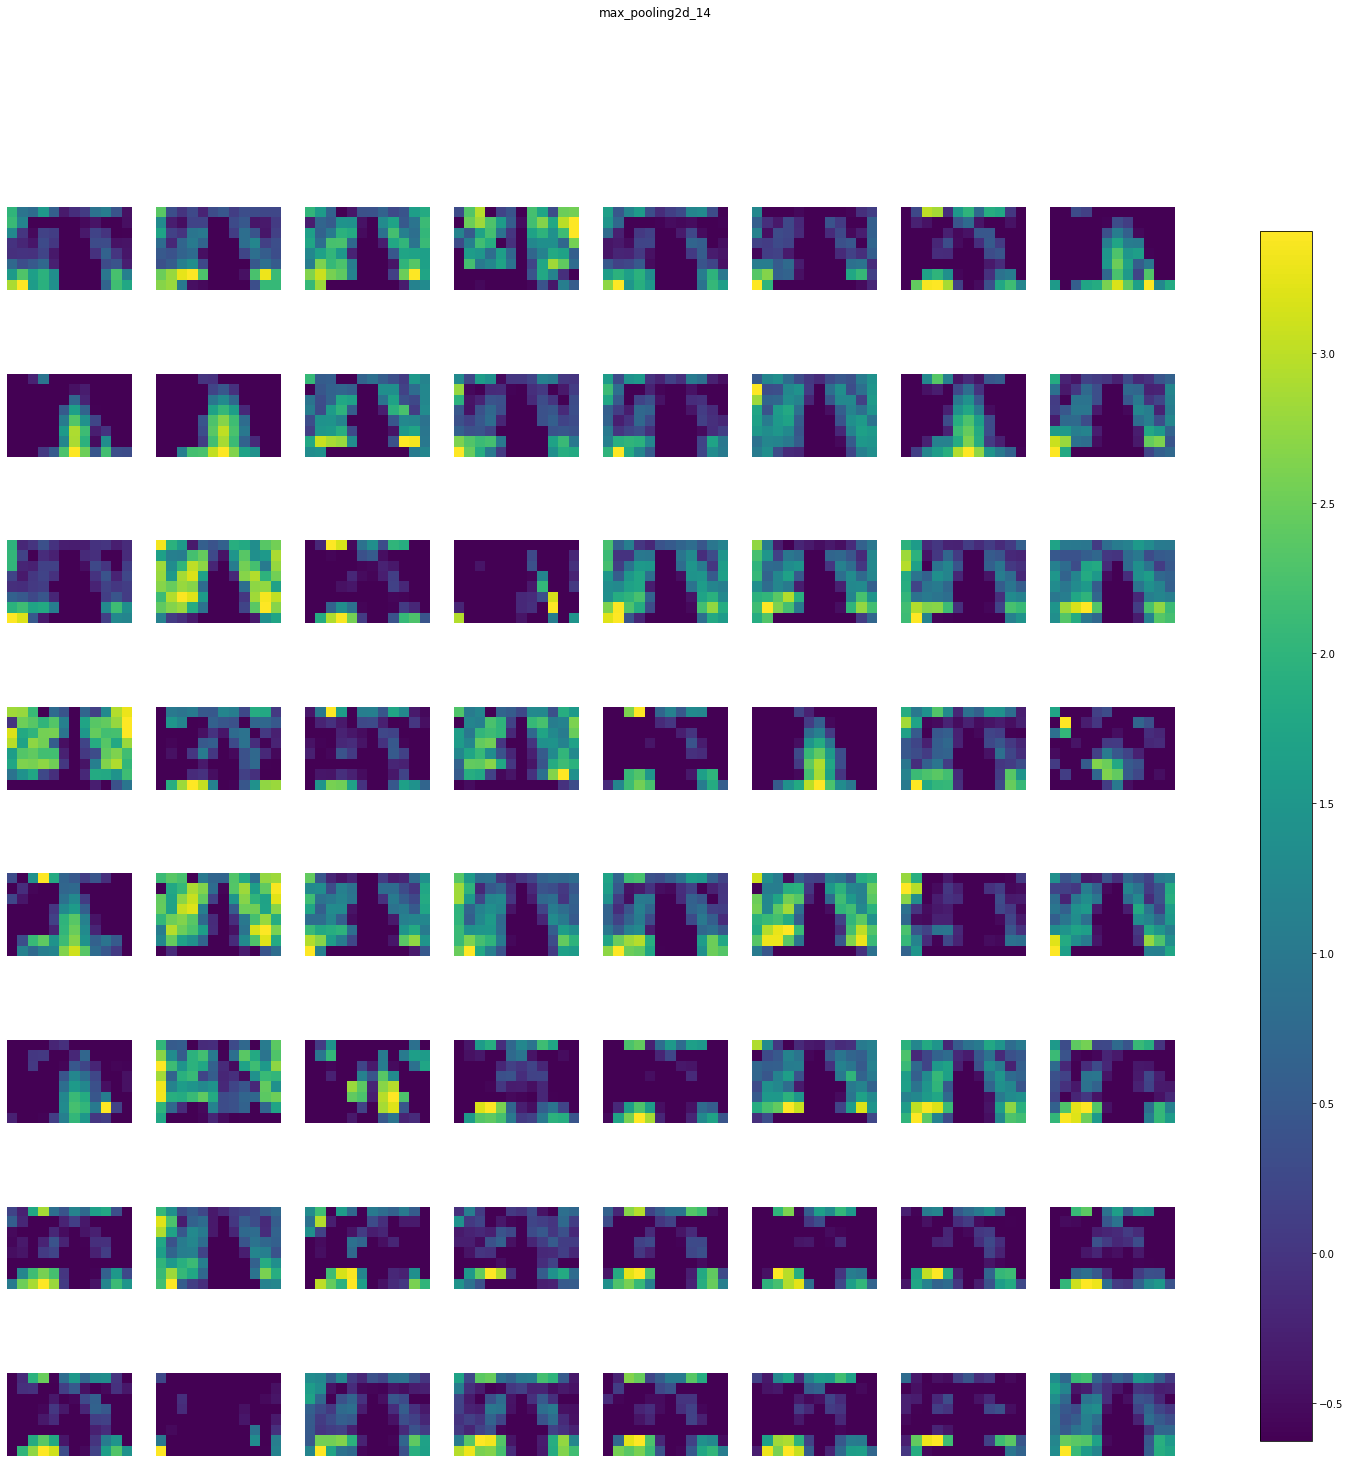

flatten_4 (1, 6144) 


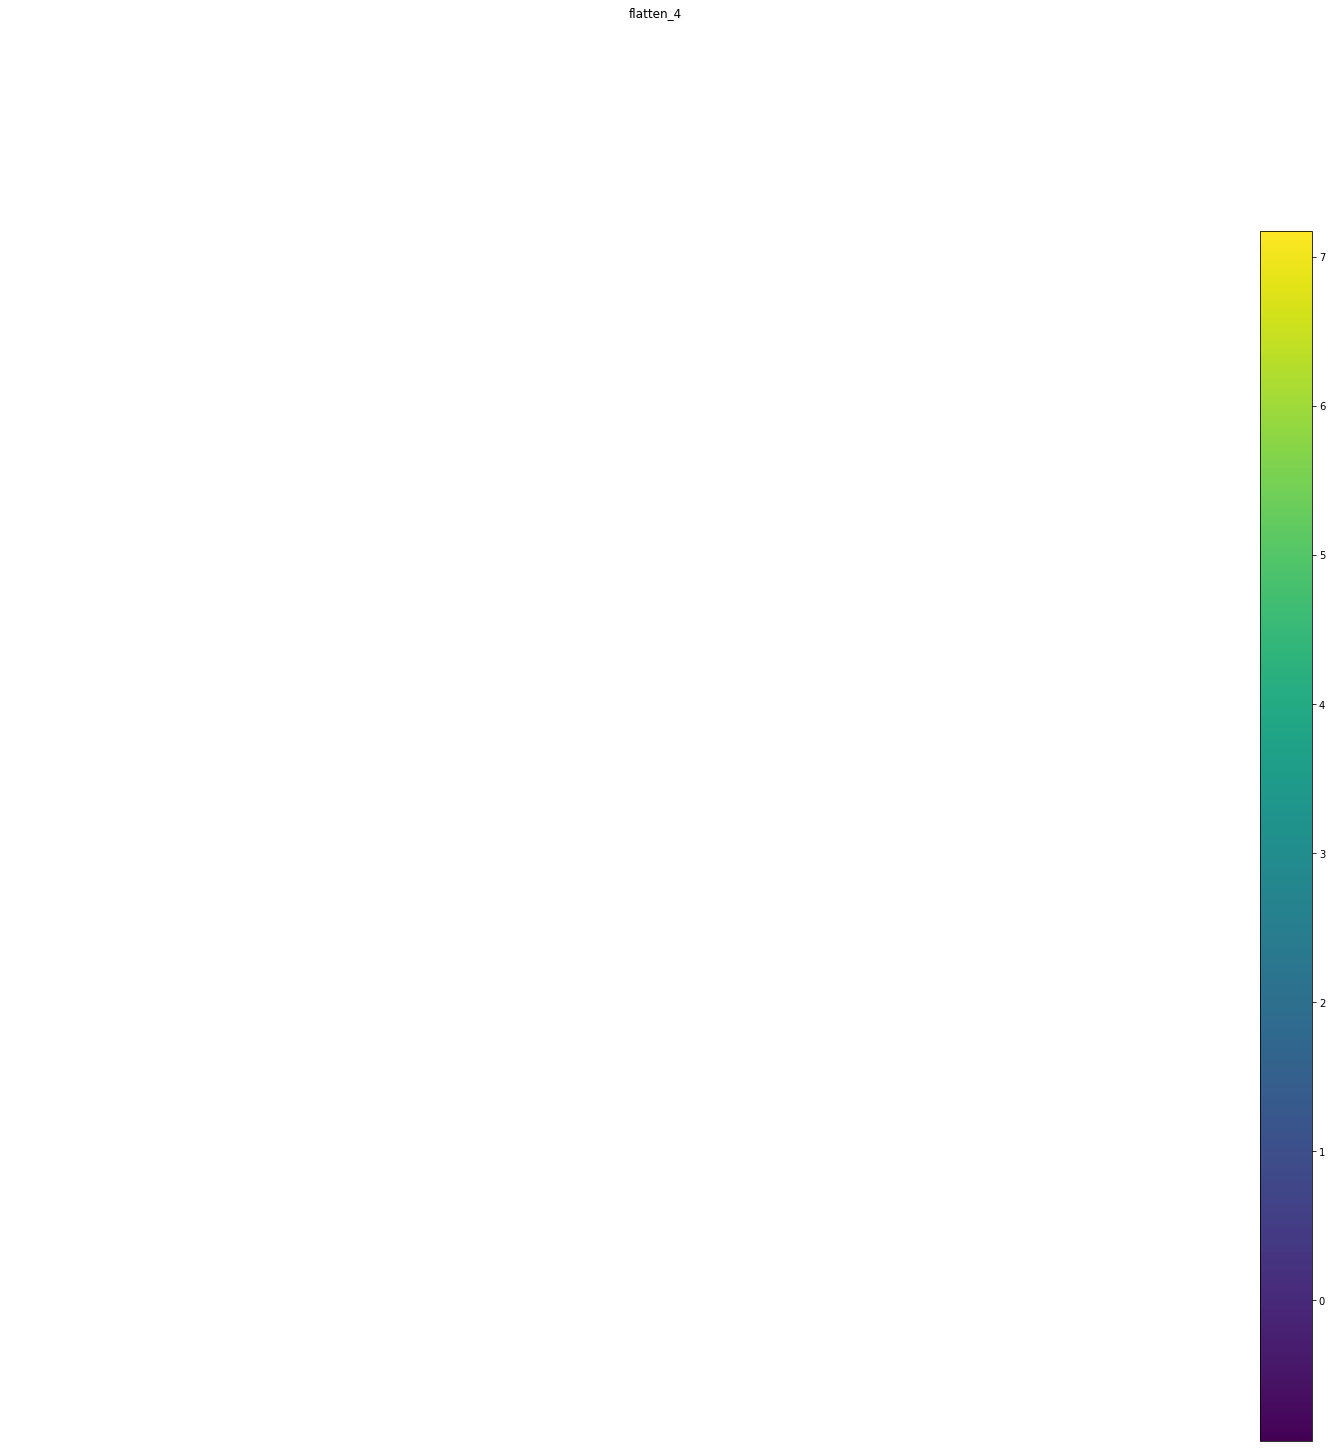

dense_8 (1, 64) 


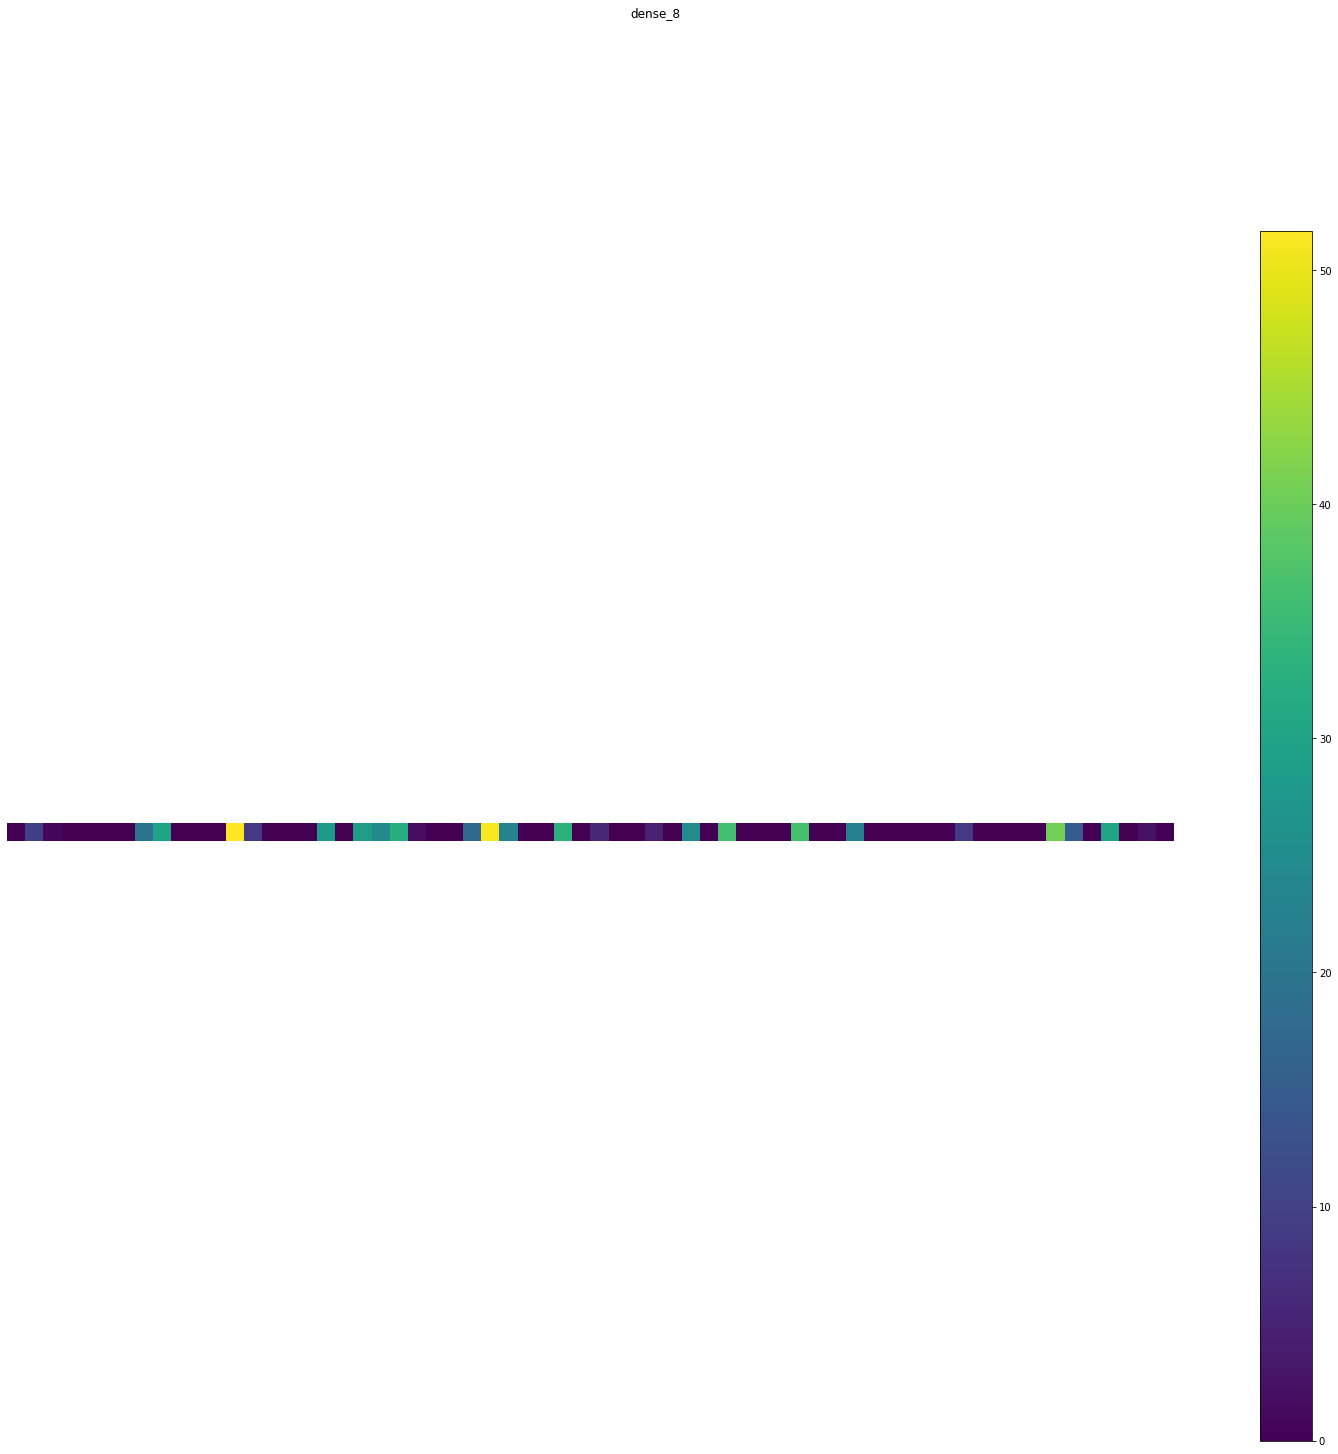

dense_9 (1, 3) 


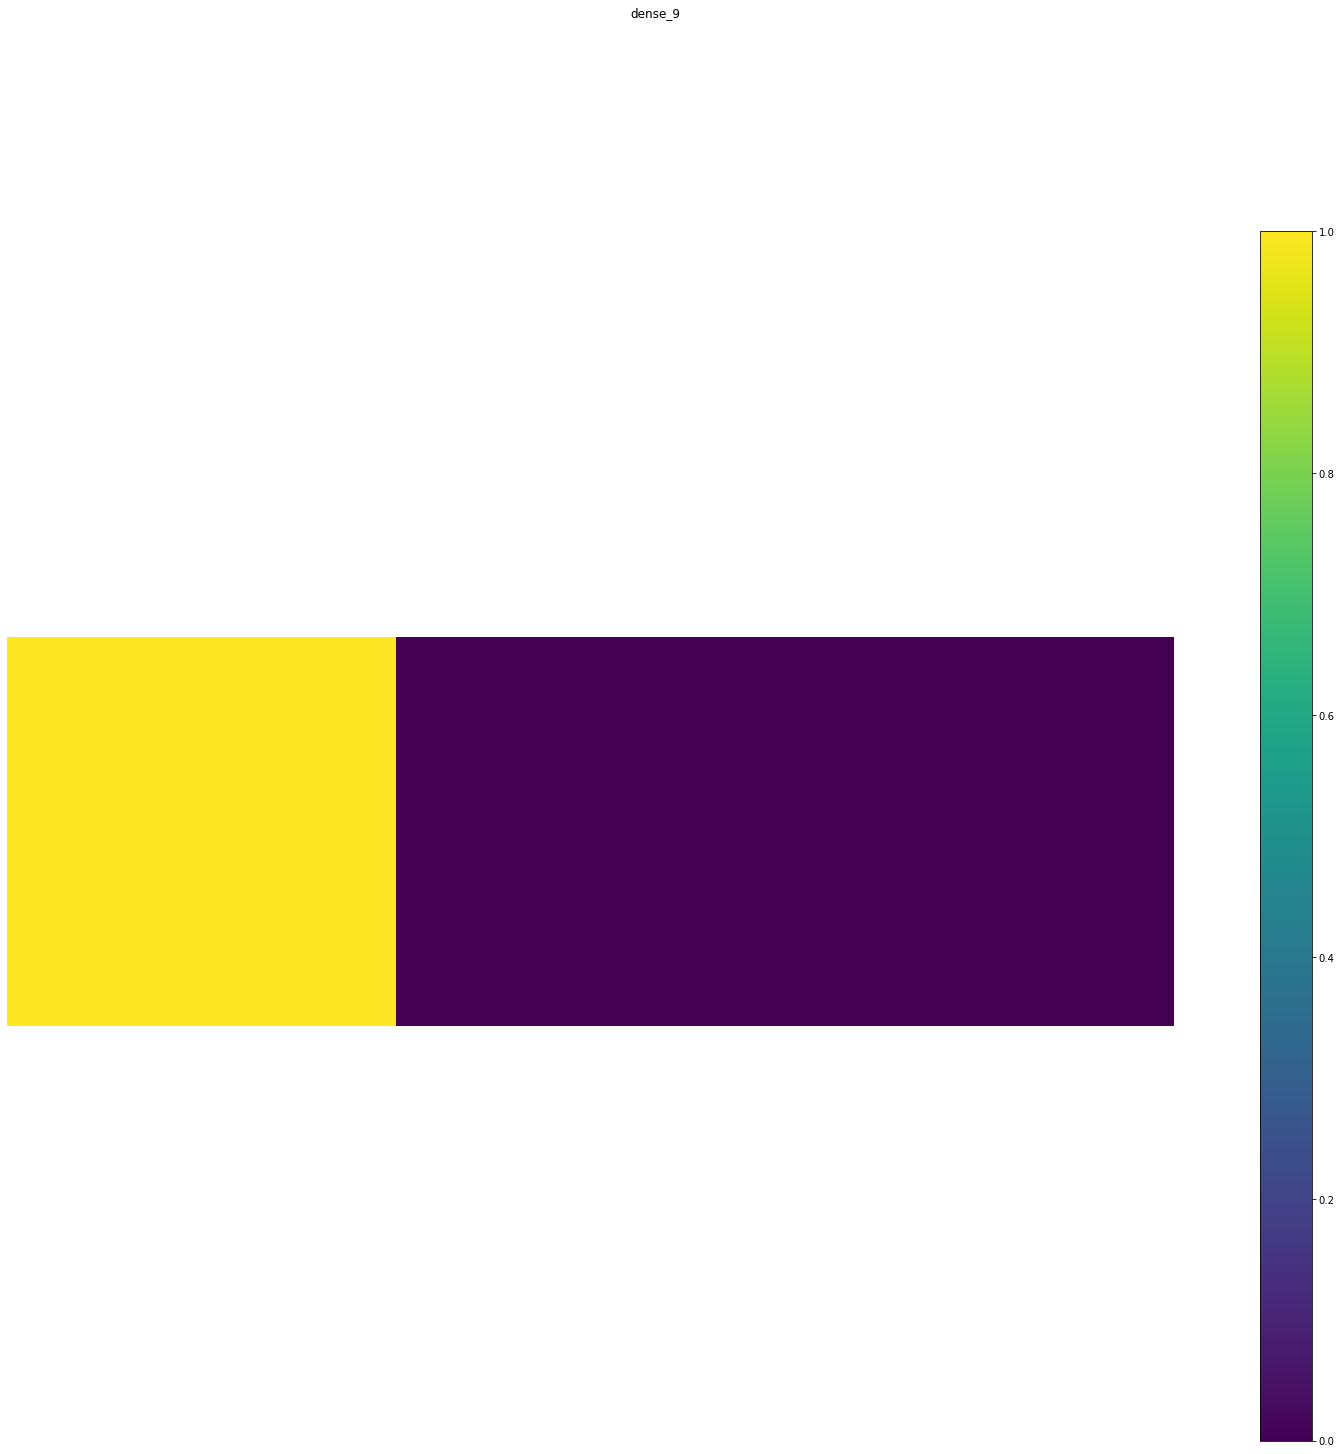

In [56]:
a = get_activations(model, images[0].reshape((1,125,175,1)))
display_activations(a)